<a href="https://colab.research.google.com/github/hsuehci314/hsuehci314/blob/master/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1-1 Load Data
1. Load fashion_mnist data from keras
2. Use pandas DataFrame to show data
3. ndarray.shape (for shape of array)

In [0]:
from keras.datasets import fashion_mnist
import pandas as pd

# load data
((trainx,trainy),(testx,testy))=fashion_mnist.load_data()
col_name = ['image(X)', 'label(Y)']
row_name = ['train', 'test']
shape =[[trainx.shape,trainy.shape],[testx.shape,testy.shape]] # Create 一個 List of List x_train shape, x_test shape, y_train shape, y_test_shape
# [["a", "b"],
#  ["c, "d"],
#   ["e", "f"]]
pd.DataFrame(shape, columns=col_name, index=row_name)

,image(X),label(Y)
train,"(60000, 28, 28)","(60000,)"
test,"(10000, 28, 28)","(10000,)"


## 1-1 More (Plot data)

8
[9 2 1 ... 8 1 5]


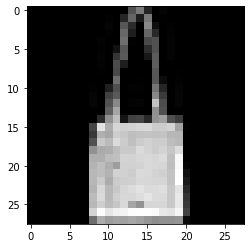

In [0]:
import matplotlib.pyplot as plt
print(trainy[200])
plt.imshow(trainx[200], cmap='gray')

## 1-2 Dimensionality Reduction (PCA)

1. Create PCA Object
2. reshape training data (60000, 28, 28) -> (60000, 784)
3. 使用 .fit() on training data
4. reshape testing data (10000, 28, 28) -> (10000, 784)
5. 使用 .transform on test data
6. 寫一個 for loop 對 每個 class 做 scatter plot

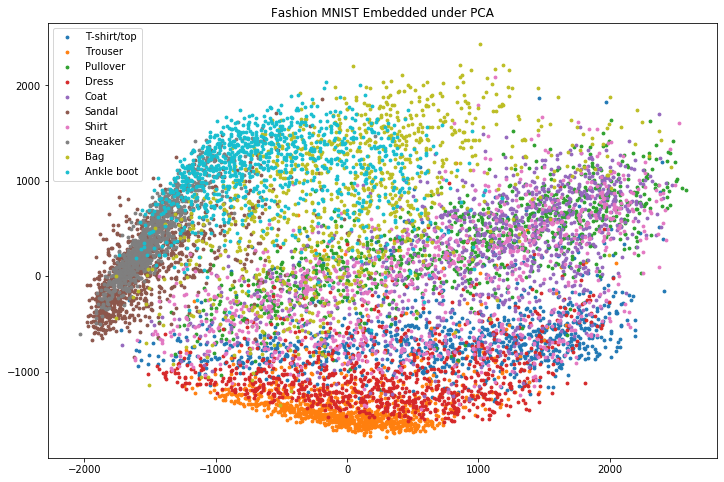

In [0]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA

plt.figure(figsize=(12, 8))

# 1. Create PCA Object
pca = PCA(2)
# 2. reshape training data (60000, 28, 28) -> (60000, 784)

pca.fit(trainx.reshape(60000,784))
# 3. 使用 .fit() on training data

# 4. reshape testing data (10000, 28, 28) -> (10000, 784)
trf=pca.transform(testx.reshape(10000,784))
# 5. 使用 .transform on test data
# 6. 寫一個 for loop 對 每個 class 做 scatter plot
for i in range(10):
    plt.scatter(trf[testy==i, 0], trf[testy==i, 1], s=8)  # 10000 2

label = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.legend(label)
plt.title("Fashion MNIST Embedded under PCA")
plt.show()


# 1-2 Dimensionality Reduction (LDA)

1. Create LDA Object
2. reshape training data (60000, 28, 28) -> (60000, 784)
3. 使用 .fit(data, label) on training data
4. reshape testing data (10000, 28, 28) -> (10000, 784)
5. 使用 .transform on test data
6. 寫一個 for loop 對 每個 class 做 scatter plot

In [0]:
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

plt.figure(figsize=(12, 8))
lda = LinearDiscriminantAnalysis(2)
# 1. Create LDA Object
# 2. reshape training data (60000, 28, 28) -> (60000, 784)
trainx_reshape=trainx.reshape(60000,784)
lda.fit(trainx_reshape,trainy)
# 3. 使用 .fit(data, label) on training data

# 4. reshape testing data (10000, 28, 28) -> (10000, 784)
# 5. 使用 .transform on test data
lda_tra = lda.transform(testx.reshape(10000,784))
print(lda_tra)
# 6. 寫一個 for loop 對 每個 class 做 scatter plot
for i in range(10):
    plt.scatter(lda_tra[testy==i, 0], lda[testy==i, 1], s=8)  # 10000 2

label = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.legend(label)
plt.title("Fashion MNIST Embedded under LDA")
plt.show()


ValueError: ignored

<Figure size 864x576 with 0 Axes>

## 2 Clustering
1. Download data from Aberdeen_HungYiLee.zip
2. Load Image through skimage.io.imread
3. Image dimension = (600, 600, 3)
4. Dimension Reduction(For better clustering) and Visualization
5. Clustering 

In [0]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


images = []
# Read images as lists
img = io.imread('Aberdeen_HungYiLee/0.jpg')
plt.imshow(img)

# 1. Reshape
# 2. Create a PCA Object
# 3. Do .fit_transform for reudction
pca = XXXX

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())


In [0]:
def plt_img(clus_index):
    fig, ax = plt.subplots(4, 4, figsize=(8,8))
    for i in range(16):
        ax[i//4, i % 4].imshow(io.imread(f'Aberdeen_HungYiLee/{clus_index[i*4][0]}.jpg')) 

### K-Means Clustering

In [0]:
from sklearn.cluster import KMeans

num_clusters = 2
# 1. Create KMeans Objects
# 2. .fit_predict() reduce features

for clus_id in range(num_clusters):
    plt_img(np.argwhere(cluster_label == clus_id))

### Agglomerative Clustering

In [0]:
from sklearn.cluster import AgglomerativeClustering

num_clusters = 2
# 1. Create AgglomerativeClustering
# 2. .fit_predict()

for clus_id in range(num_clusters):
    plt_img(np.argwhere(cluster_label == clus_id))